In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train_bikes.csv",parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [4]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


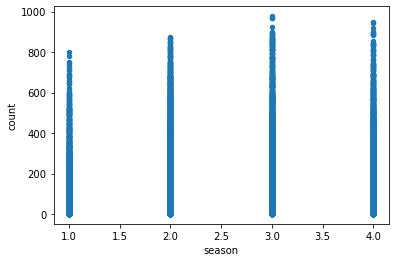

In [6]:
train.plot.scatter(x='season',y='count')

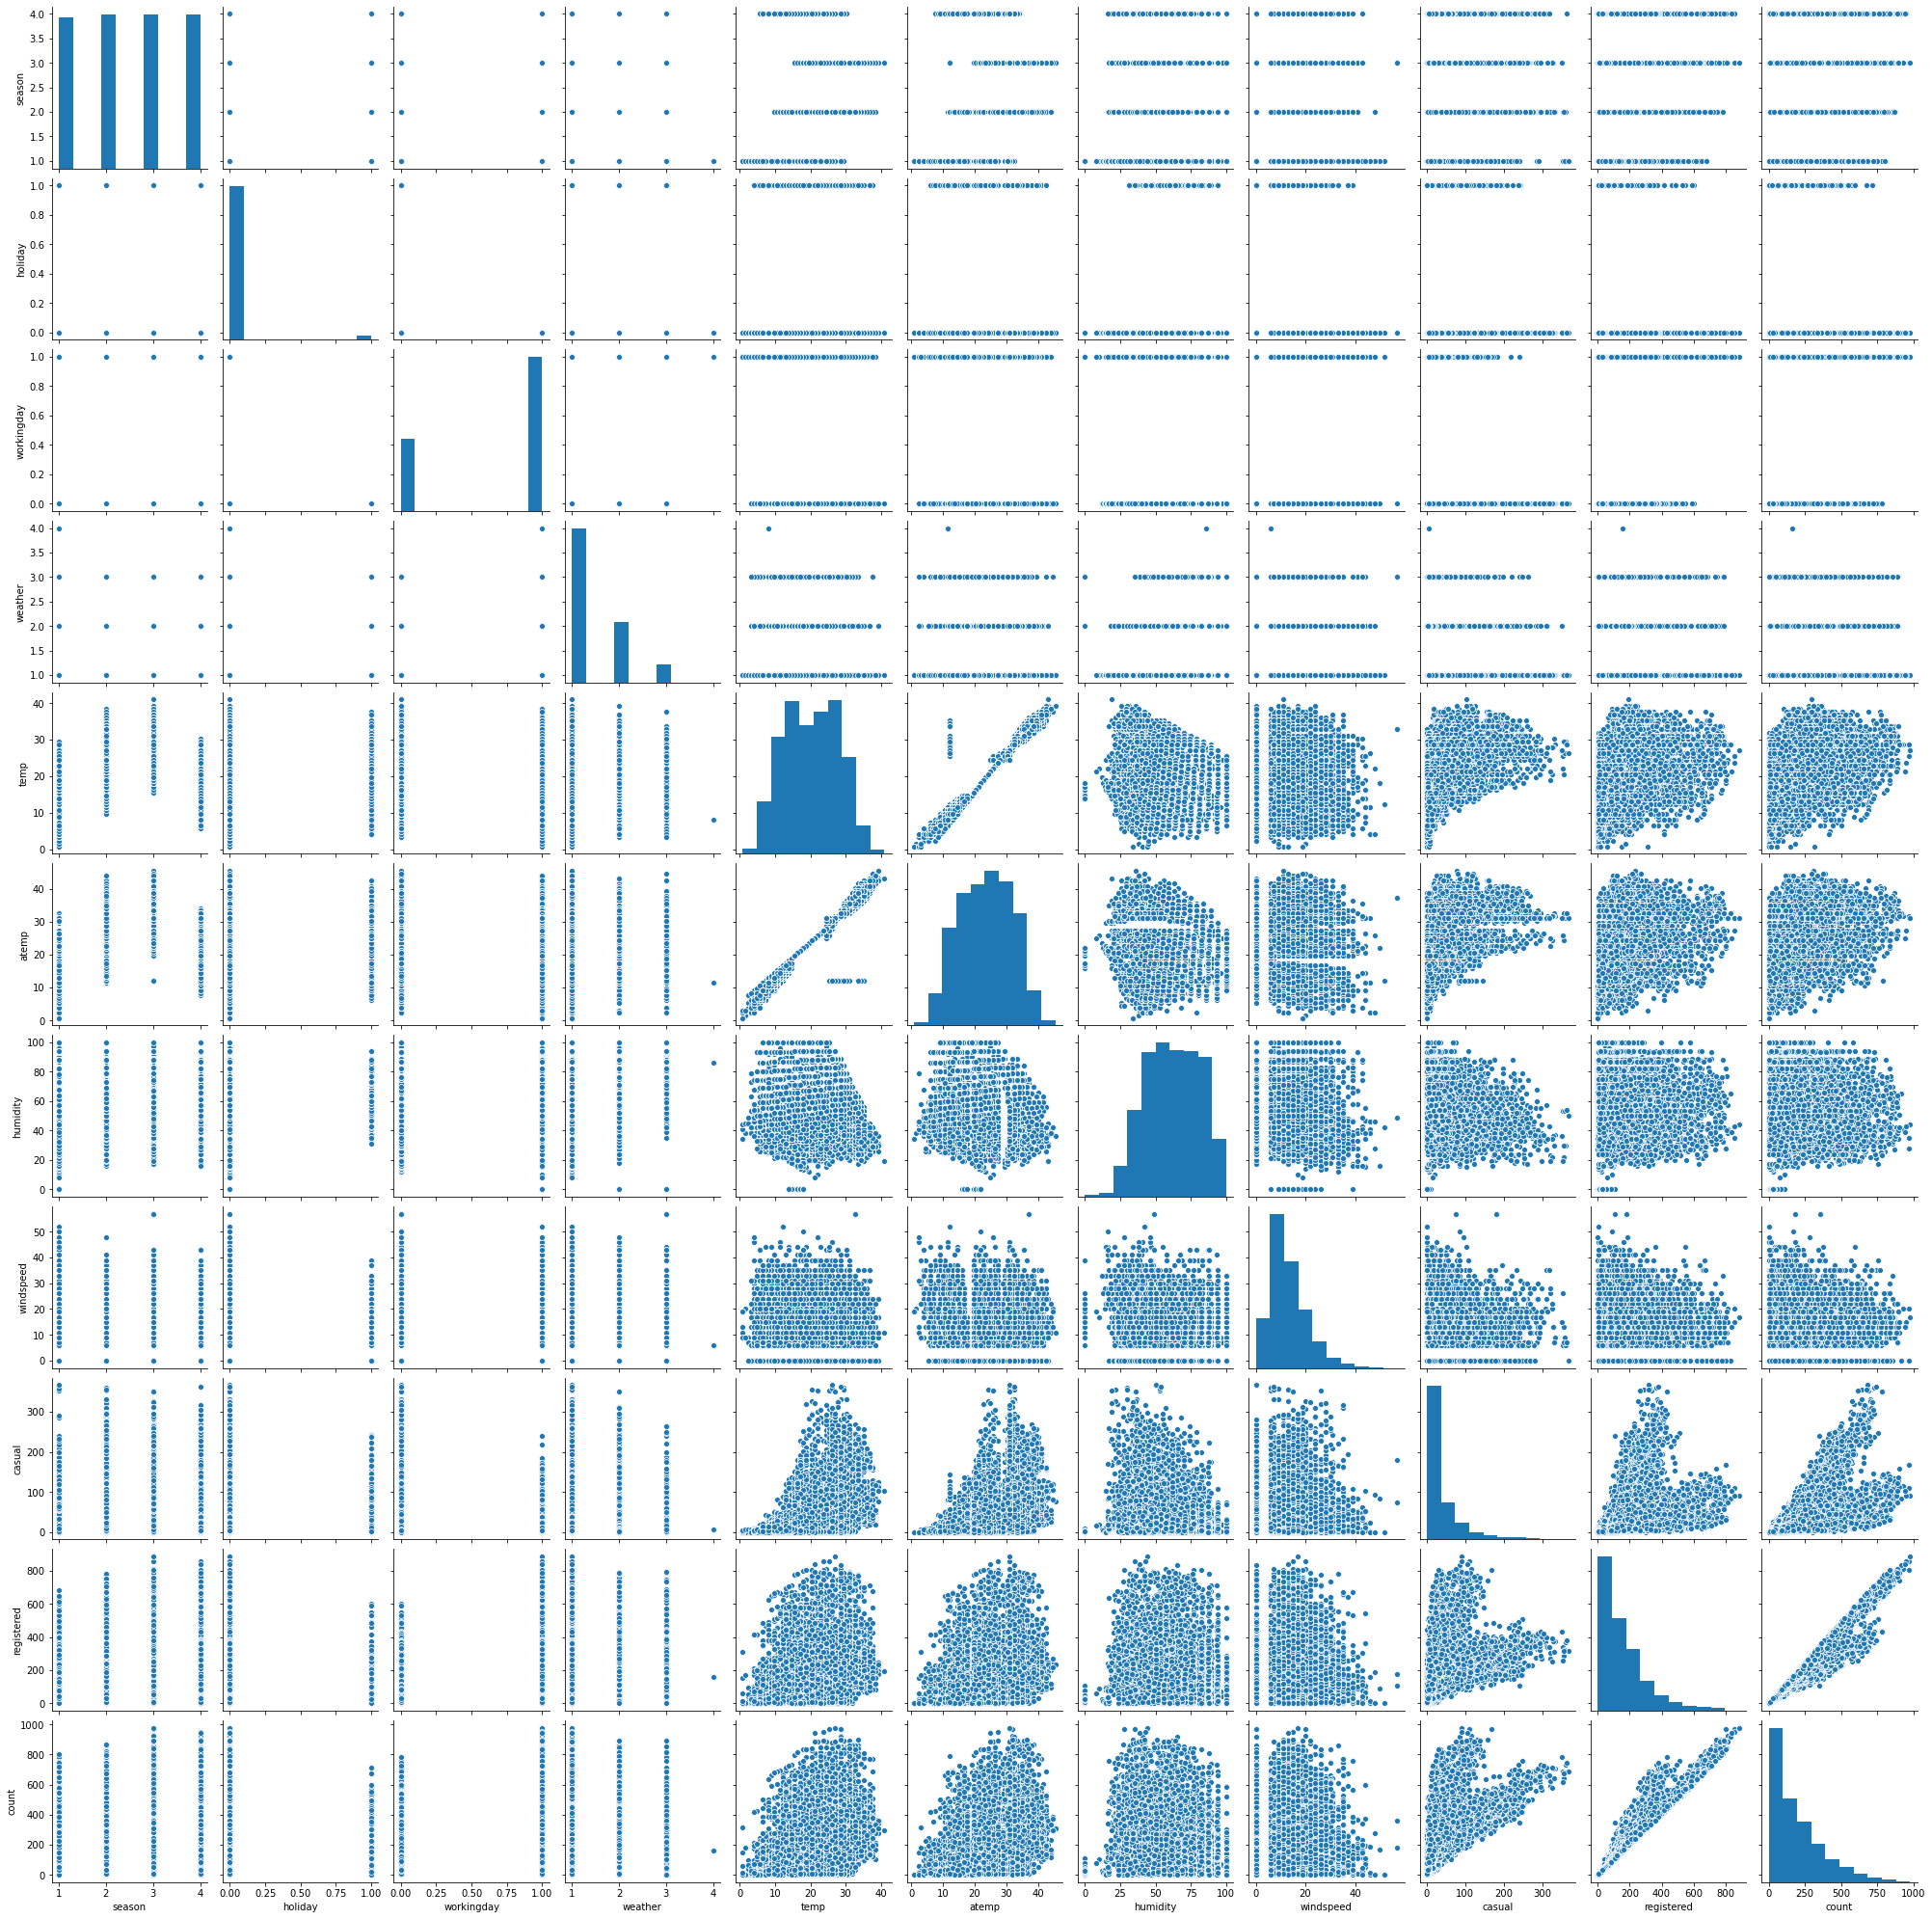

In [7]:
sns.pairplot(train)

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


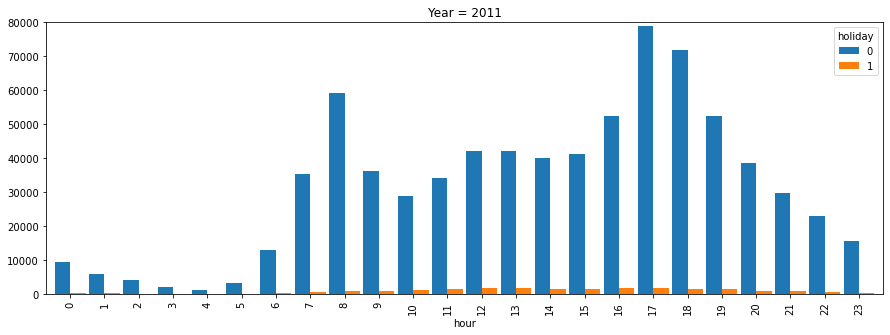

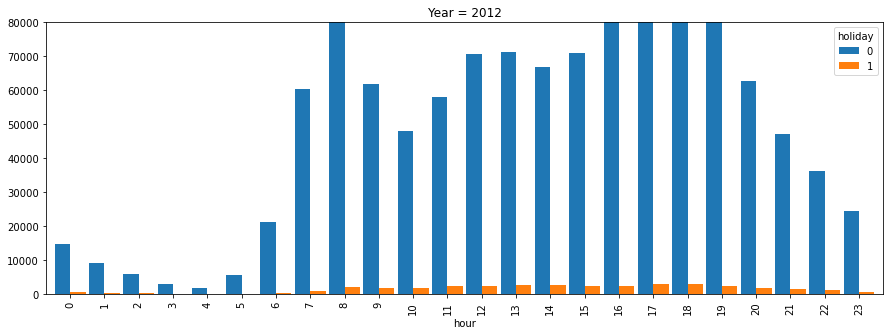

In [8]:
def plot_by_hour(data,agg='sum',year=None,lbl=None):
    #dd = train[train.datetime.dt.year==2012]
    dd = data
    dd.loc[:,('hour')] = dd.datetime.dt.hour

    by_hour = dd.groupby(['hour',lbl])['count'].agg('sum').unstack()

    return by_hour.plot(kind='bar',ylim=(0,80000),figsize=(15,5),width=0.9,title='Year = {0}'.format(year))

for yr in train.datetime.dt.year.unique():
    train_data = train[train.datetime.dt.year==yr]
    #train_data
    plot_by_hour(train_data,year=yr,lbl='holiday')
    #print(yr)

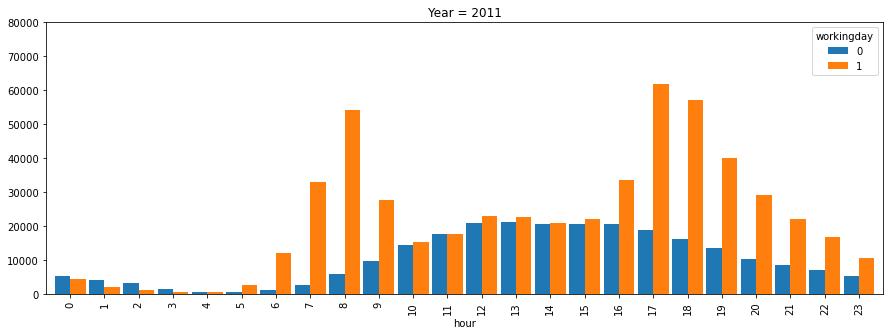

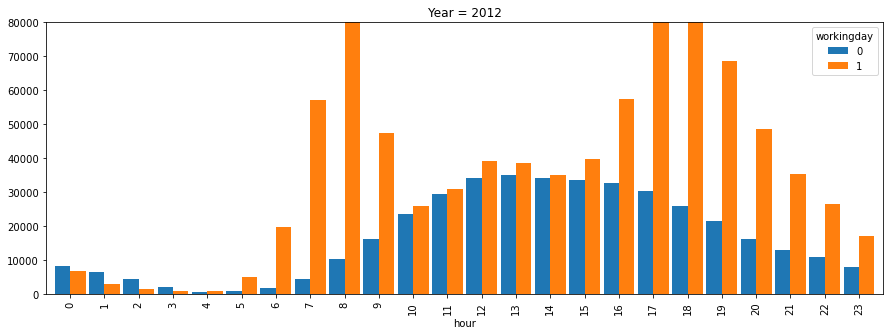

In [9]:
for yr in train.datetime.dt.year.unique():
    train_data = train[train.datetime.dt.year==yr]
    #train_data
    plot_by_hour(train_data,year=yr,lbl='workingday')
    #print(yr)

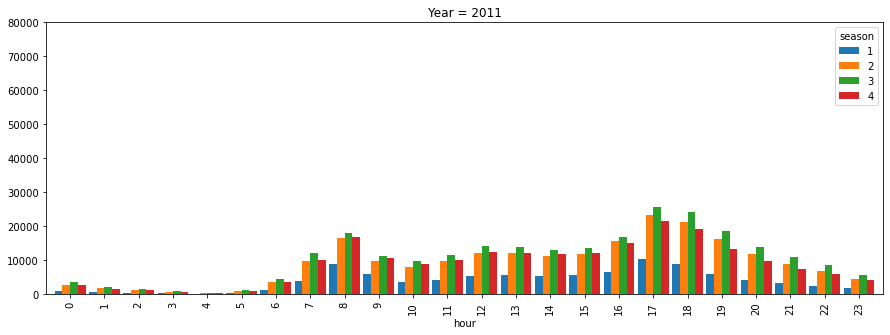

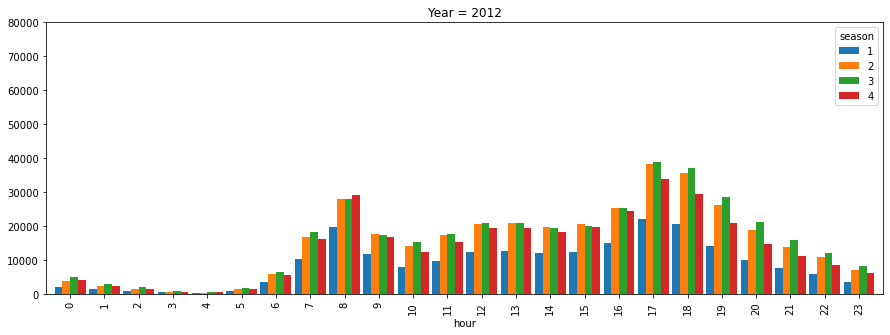

In [10]:
for yr in train.datetime.dt.year.unique():
    train_data = train[train.datetime.dt.year==yr]
    #train_data
    plot_by_hour(train_data,year=yr,lbl='season')
    #print(yr

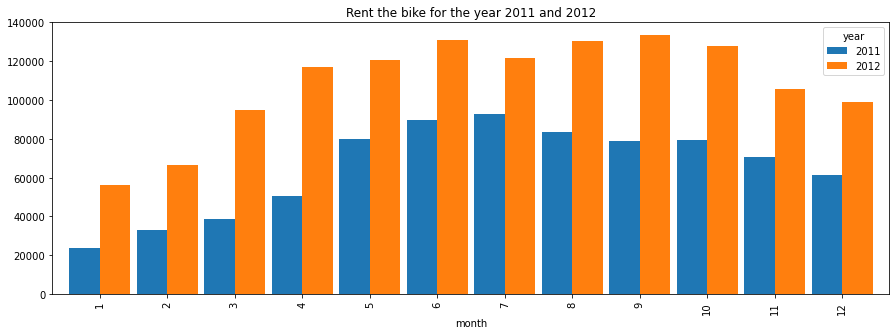

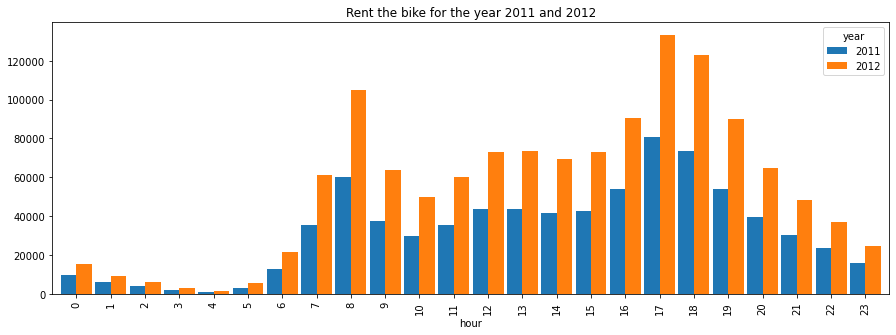

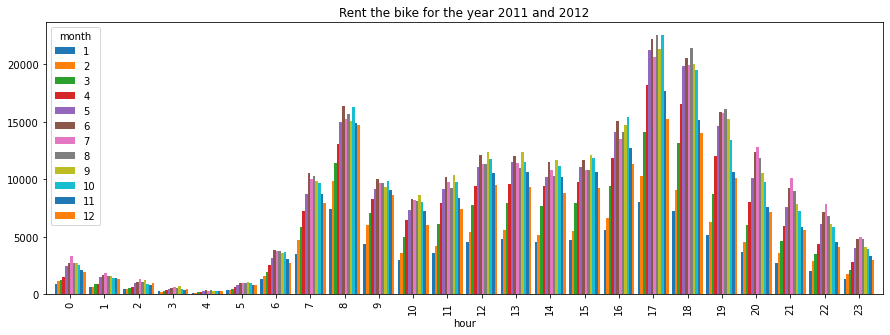

In [11]:
def plot_by_year(data,title=None,lbl1=None,lbl2=None):
    #dd = train[train.datetime.dt.year==2012]
    dd = data
    dd.loc[:,('hour')] = dd.datetime.dt.hour
    dd.loc[:,('month')] = dd.datetime.dt.month
    dd.loc[:,('year')] = dd.datetime.dt.year

    by_hour = dd.groupby([lbl1,lbl2])['count'].agg('sum').unstack()

    return by_hour.plot(kind='bar',figsize=(15,5),width=0.9,title=title)


plot_by_year(train,title='Rent the bike for the year 2011 and 2012',lbl1='month',lbl2='year')
plot_by_year(train,title='Rent the bike for the year 2011 and 2012',lbl1='hour',lbl2='year')
plot_by_year(train,title='Rent the bike for the year 2011 and 2012',lbl1='hour',lbl2='month')

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

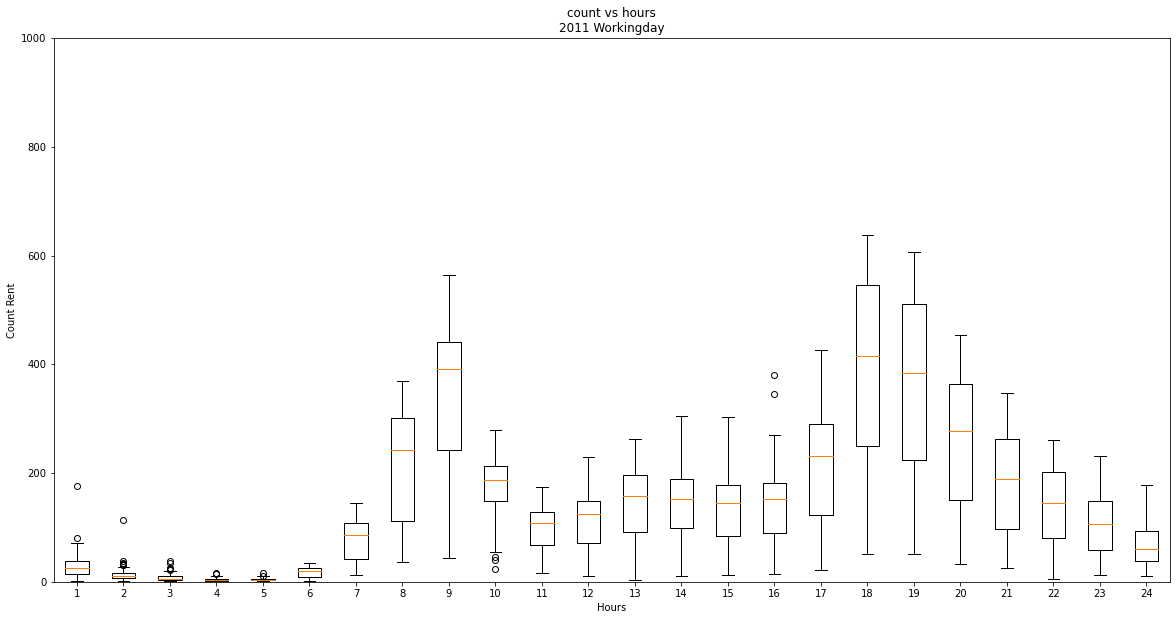

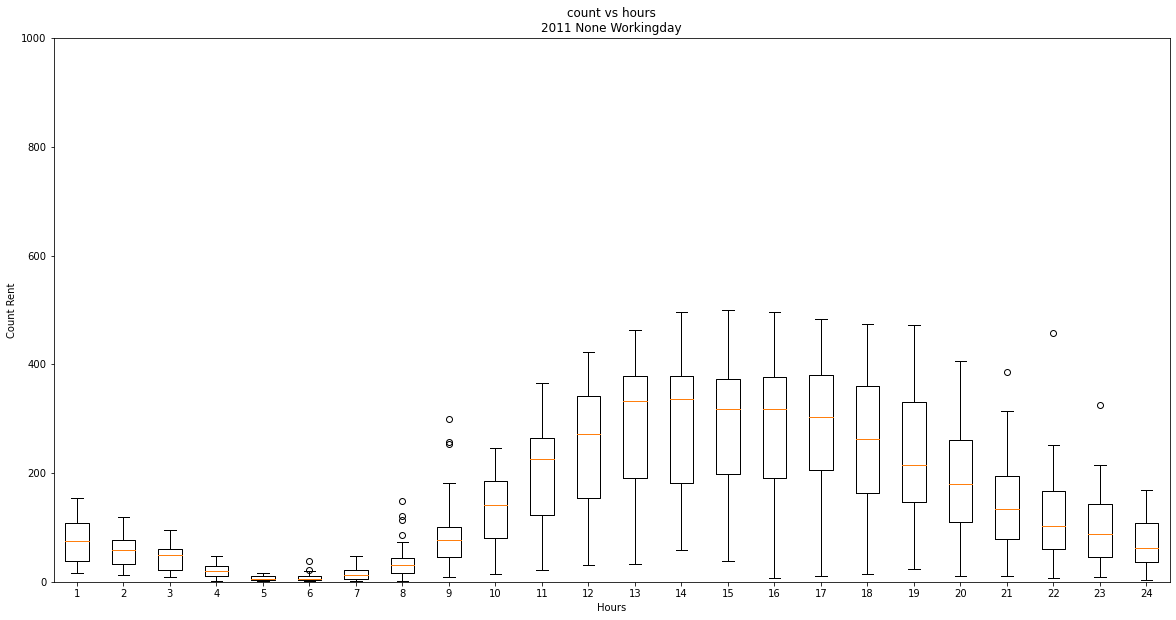

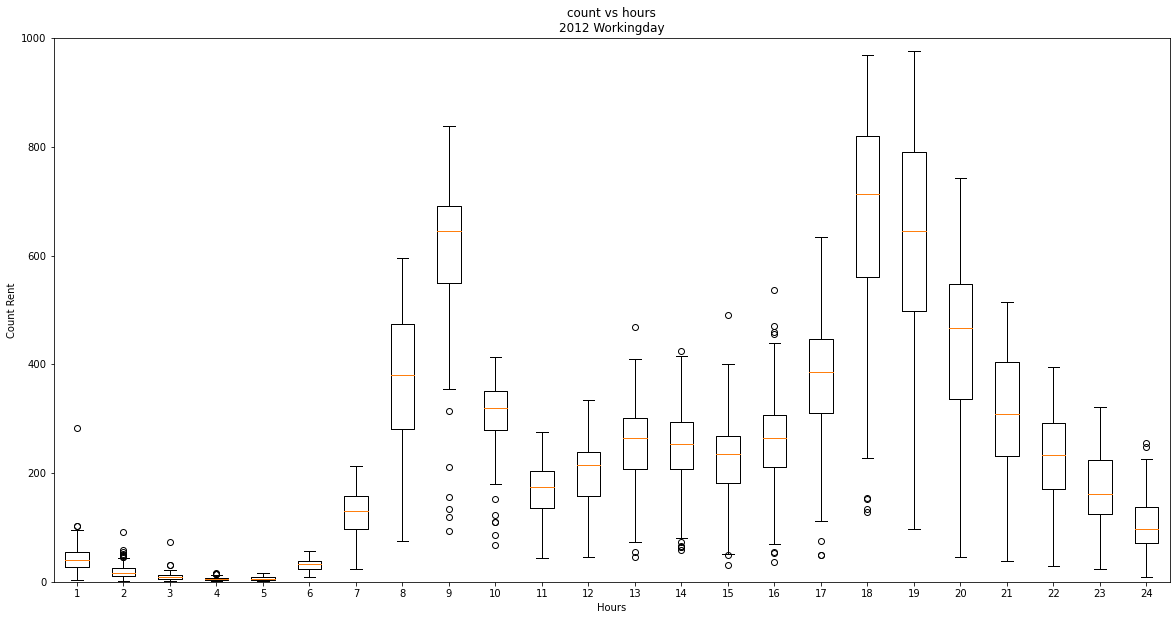

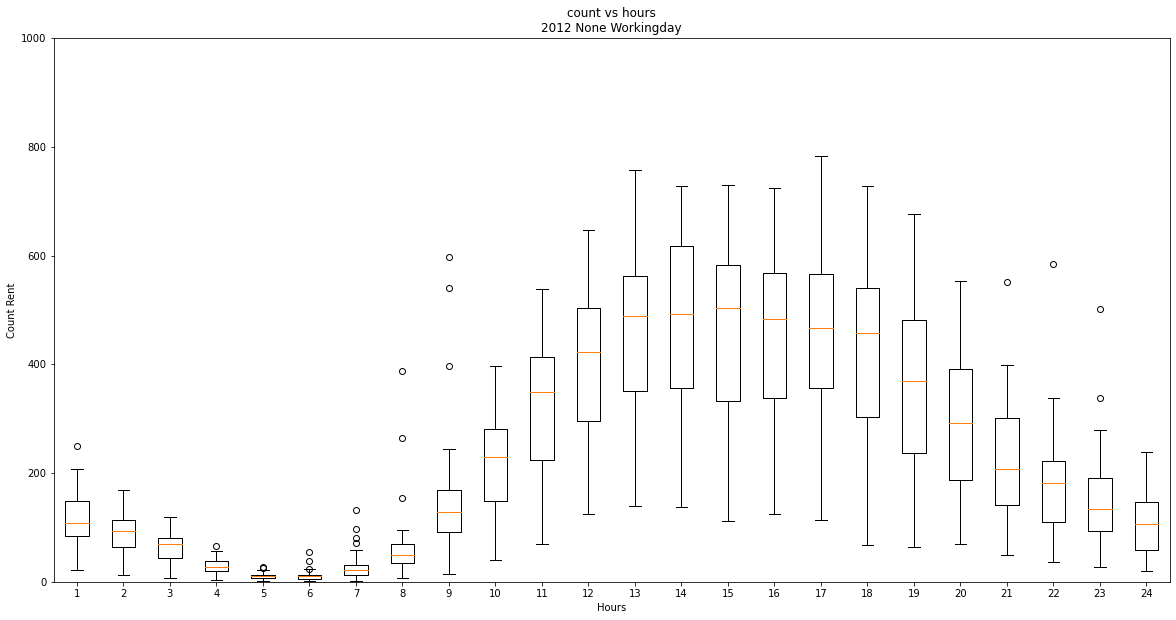

In [12]:
def plot_by_hour(data,agg='sum',title=None):
    #dd = train[train.datetime.dt.year==2012]
    dd = data
    dd.loc[:,('hour')] = dd.datetime.dt.hour
    
    hours={}
    for hour in range(24):
        hours[hour]=dd[dd.hour==hour]['count'].values
    plt.figure(figsize=(20,10))    
    plt.boxplot([hours[hour] for hour in range(24)])
    plt.xlabel('Hours')
    plt.ylabel('Count Rent')
    plt.title('count vs hours\n'+title)
    plt.ylim(0,1000)
    #return by_hour.plot(kind='boxplot',ylim=(0,80000),figsize=(15,5),title='Year = {0}'.format(year))

data = train[(train.workingday==1) & (train.datetime.dt.year==2011)]
plot_by_hour(data,title='2011 Workingday')
data = train[(train.workingday==0) & (train.datetime.dt.year==2011)]
plot_by_hour(data,title='2011 None Workingday')
data = train[(train.workingday==1) & (train.datetime.dt.year==2012)]
plot_by_hour(data,title='2012 Workingday')
data = train[(train.workingday==0) & (train.datetime.dt.year==2012)]
plot_by_hour(data,title='2012 None Workingday')

In [22]:
train = pd.read_csv("train_bikes.csv",parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [51]:
def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [40]:
test = pd.read_csv("test_bikes.csv", parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [52]:
train.loc[:,('hour')] = train.datetime.dt.hour
test.loc[:,('hour')] = test.datetime.dt.hour

train['hour'] = train['hour'].apply(categorical_to_numeric)
test['hour'] = test['hour'].apply(categorical_to_numeric)

In [54]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0


In [55]:
train_column = train.select_dtypes(include=np.number).columns.tolist()
print(train_column)

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour']


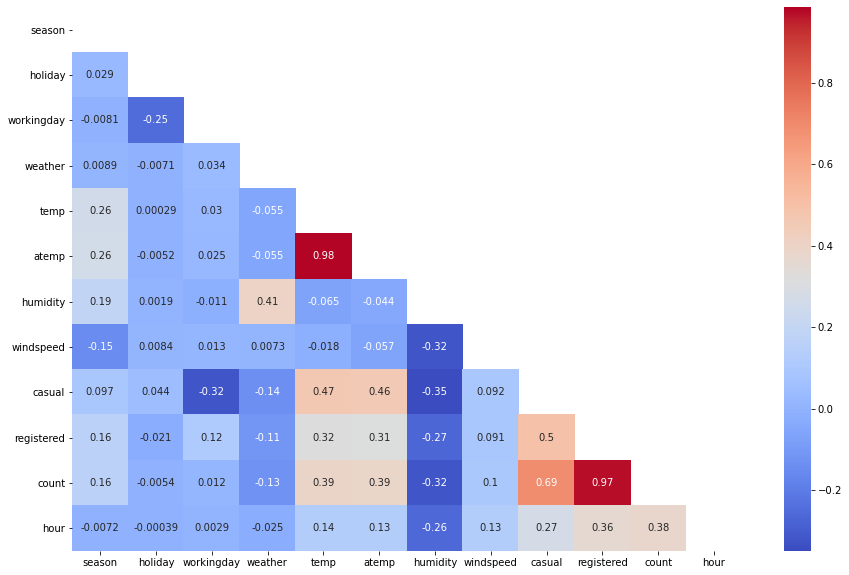

In [57]:
fig,ax = plt.subplots(figsize=(15,10))
mask = np.zeros(CorrMat.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(CorrMat, annot=True,ax=ax, cmap='coolwarm', mask=mask)

In [ ]:
model_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'casual', 'count', 'hour']

In [58]:
# drop unnecessary columns
train = train.drop(['datetime'],axis=1)
test = test.drop(['datetime'],axis=1)

In [60]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,1,0,1,1,10.66,11.365,56,26.0027,0
1,1,0,1,1,10.66,13.635,56,0.0000,0
2,1,0,1,1,10.66,13.635,56,0.0000,0
3,1,0,1,1,10.66,12.880,56,11.0014,0
4,1,0,1,1,10.66,12.880,56,11.0014,0
